In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [30]:
# load in the dataset and check it 
df_bike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [31]:
#change the types and clean data 
df_bike['end_time']= pd.to_datetime(df_bike['end_time'])
df_bike['start_time']= pd.to_datetime(df_bike['start_time'])
df_bike['start_station_id'] = df_bike['start_station_id'].astype('str')
df_bike['end_station_id'] = df_bike['end_station_id'].astype('str')
df_bike['bike_id'] = df_bike['bike_id'].astype('str')
df_bike['user_type'] = df_bike['user_type'].astype('category')
df_bike['member_gender'] = df_bike['member_gender'].astype('category')
df_bike['member_birth_year'] = df_bike['member_birth_year'].astype('Int64')

In [32]:
# filter data
df_bike['member_birth_year'] = 2021 - df_bike['member_birth_year']
df_bike.rename(columns = {'member_birth_year' : 'member_age'} , inplace = True)
df_bike['start_date'] = [d.date() for d in df_bike['start_time']]
df_bike['end_date'] = [d.date() for d in df_bike['end_time']]
df_bike['start_date'] = pd.to_datetime(df_bike['start_date'])
df_bike['start_day'] = df_bike['start_date'].dt.day_name()
df_bike['start_date'] = pd.to_datetime(df_bike['start_date'])
df_bike['start_month'] = df_bike['start_date'].dt.month_name()
df_bike['end_date'] = pd.to_datetime(df_bike['end_date'])
df_bike['end_day'] = df_bike['end_date'].dt.day_name()
df_bike['end_date'] = pd.to_datetime(df_bike['end_date'])
df_bike['end_month'] = df_bike['end_date'].dt.month_name()
df_bike['start_time'] = df_bike['start_time'].values.astype('<M8[m]')
df_bike['end_time'] = df_bike['end_time'].values.astype('<M8[m]')
df_bike['start_time_hour'] = df_bike['start_time'].dt.time
df_bike['end_time_hour'] = df_bike['end_time'].dt.time
df_bike['duration_minute'] = df_bike['duration_sec']/60
df_bike['duration_minute'] = df_bike['duration_minute'].astype('int')

### The distribution of trip durations


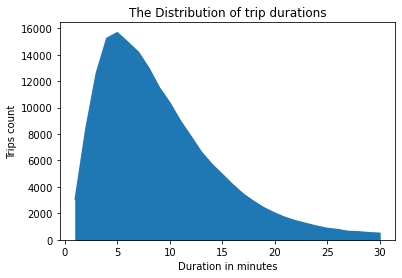

In [33]:
#the distribution of trip durations
df_bike['duration_minute'].value_counts()[0:30].sort_index().plot.area();
plt.xlabel("Duration in minutes")
plt.ylabel("Trips count")
plt.title("The Distribution of trip durations")

plt.show()

- as we see the short trips are the most common less than 30 minutes

In [34]:
#filter them to be easy to get analysis result 
df_bike = df_bike.query('duration_minute <= 30')
df_bike.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177129 entries, 4 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             177129 non-null  int64         
 1   start_time               177129 non-null  datetime64[ns]
 2   end_time                 177129 non-null  datetime64[ns]
 3   start_station_id         177129 non-null  object        
 4   start_station_name       176948 non-null  object        
 5   start_station_latitude   177129 non-null  float64       
 6   start_station_longitude  177129 non-null  float64       
 7   end_station_id           177129 non-null  object        
 8   end_station_name         176948 non-null  object        
 9   end_station_latitude     177129 non-null  float64       
 10  end_station_longitude    177129 non-null  float64       
 11  bike_id                  177129 non-null  object        
 12  user_type       

### The distribution of member age 

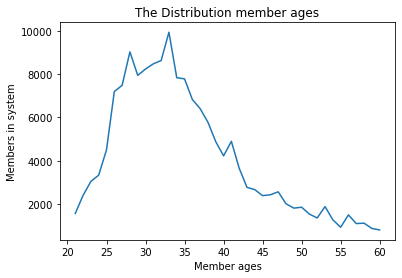

In [35]:
#the distribution of member_age 
df_bike['member_age'].value_counts()[0:40].sort_index().plot.line();
plt.xlabel("Member ages")
plt.ylabel("Members in system")
plt.title("The Distribution member ages")

plt.show()

- here the range of members age between 25 and 40 are the most common

In [36]:
#filter them to be easy to get analysis result 
df_bike = df_bike.query('member_age <= 45')
df_bike.info(null_counts=True)

ValueError: unknown type object

### the distribution of member gender

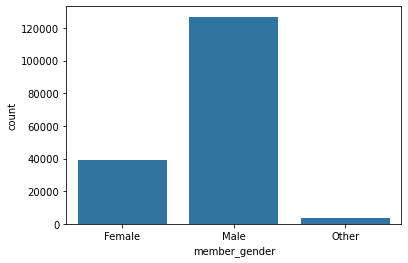

In [37]:
base_color= sb.color_palette()[0]
sb.countplot(data=df_bike, x='member_gender',color=base_color);

- male are the most common members

### the distribution of user types

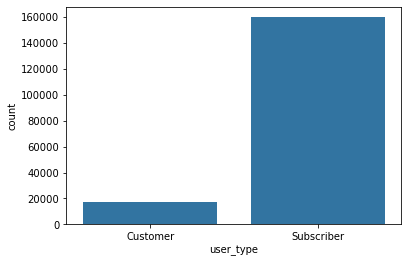

In [38]:
base_color= sb.color_palette()[0]
sb.countplot(data=df_bike, x='user_type',color=base_color);

- subscriber are the most common in the system

### The distrbution relation between user type and gender and the used days

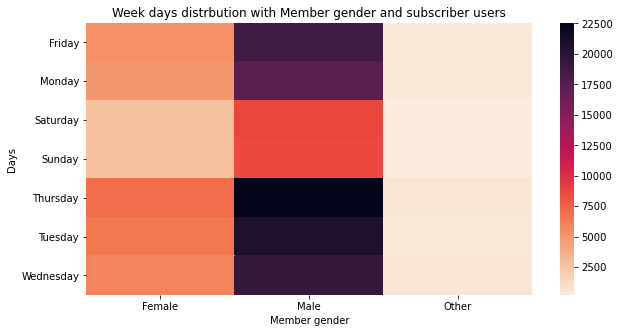

In [39]:
#Week days distrbution with Member gender and subscriber users
subscribers = df_bike.query('user_type == "Subscriber"')
st_coun = subscribers.groupby(['start_day', 'member_gender']).size()
st_coun = st_coun.reset_index(name='count')
st_coun = st_coun.pivot(index='start_day', columns='member_gender', values='count')
plt.figure(figsize = [10, 5]);
sb.heatmap(st_coun, cmap='rocket_r');
plt.title("Week days distrbution with Member gender and subscriber users");
plt.xlabel('Member gender');
plt.ylabel('Days');

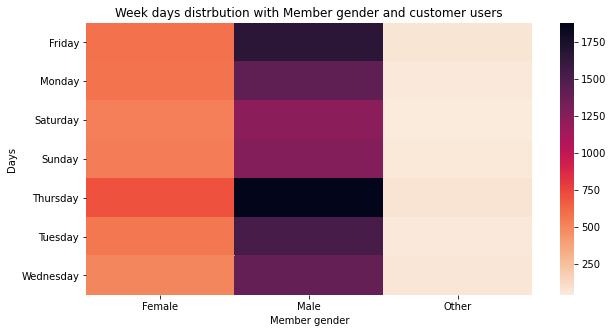

In [40]:
#Week days distrbution with Member gender and customer users
customers = df_bike.query('user_type == "Customer"')
ct_coun = customers.groupby(['start_day', 'member_gender']).size()
ct_coun = ct_coun.reset_index(name='count')
ct_coun = ct_coun.pivot(index='start_day', columns='member_gender', values='count')
plt.figure(figsize = [10, 5]);
sb.heatmap(ct_coun, cmap='rocket_r');
plt.xlabel('Member gender');
plt.ylabel('Days');
plt.title("Week days distrbution with Member gender and customer users");


In [41]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt



[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 675462 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\MBR\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\MBR\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\MBR\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\MBR\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\MBR\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users